<a href="https://www.kaggle.com/code/towhidultonmoy/automated-eda-for-nlp-data-purifier?scriptVersionId=94378972" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Installing the library**

In [1]:
%%capture
!pip install data-purifier
!python -m spacy download en_core_web_sm

In [2]:
# importing packages

import datapurifier as dp
from datapurifier import Mleda
from datapurifier import Nlpeda
from datapurifier import Nlpurifier
from datapurifier import  MlReport

import seaborn as sns
import pandas as pd
import numpy as np

print(dp.__version__)

0.3.4


# **Get the list of the example dataset**

In [3]:
print(dp.get_dataset_names()) # to get all dataset names
print(dp.get_text_dataset_names()) # to get all text dataset names

['boston_housing', 'breast_cancer', 'diabetes', 'iris', 'pima_indians_diabetes', 'sample_superstore', 'tips', 'titanic', 'us_arrests', 'womens_clothing_e_commerce_reviews', 'zoo']
['womens_clothing_e-commerce_reviews']


**Basic NLP**

    It will check for null rows and drop them (if any) and then will perform following analysis row by row and will return dataframe containing those analysis:
*         Word Count
*         Character Count
*         Average Word Length
*         Stop Word Count
*         Uppercase Word Count

Later you can also observe distribution of above mentioned analysis just by selecting the column from the dropdown list, and our system will automatically plot it.

    It can also perform sentiment analysis on dataframe row by row, giving the polarity of each sentence (or row), later you can also view the distribution of polarity.

**Word Analysis**

*     Can find count of specific word mentioned by the user in the textbox.
*     Plots wordcloud plot
*     Perform Unigram, Bigram, and Trigram analysis, returning the dataframe of each and also showing its respective distribution plot.


In [4]:
import numpy as np
import pandas as pd
from datapurifier import Nlpurifier, NLAutoPurifier

df=pd.read_csv("../input/elon-musk-buys-twitter-tweets-dataset/twitter.csv")
df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1520171503249154048,1520157287800737792,2022-04-29 22:41:44 UTC,2022-04-29,22:41:44,0,727006498816151553,abhorspolitics,Politics should be illegal,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Lefty_Jew', 'name': 'Brian 👁...",NaN,NaN,NaN,NaN
1,1520171498685747200,1520139831724044289,2022-04-29 22:41:43 UTC,2022-04-29,22:41:43,0,2378976607,uslenghil,Lucas Uslenghi,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Mati_Anon', 'name': 'Mati Añ...",NaN,NaN,NaN,NaN
2,1520171495871467526,1520171495871467526,2022-04-29 22:41:42 UTC,2022-04-29,22:41:42,0,2604307466,juliawhatman,Julia,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1520171491979153408,1520171491979153408,2022-04-29 22:41:41 UTC,2022-04-29,22:41:41,0,512714945,c4rlosl3on77,Carlos León 77,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1520171491702329344,1520066331311325185,2022-04-29 22:41:41 UTC,2022-04-29,22:41:41,0,1518986704895582211,marciagarciara,Marcia Garcia Raphael,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'leandroruschel', 'name': 'Le...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10003,1520137903413895169,1520137188184363010,2022-04-29 20:28:13 UTC,2022-04-29,20:28:13,0,1341876579425787910,ex_magaly,simplementealan,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
10004,1520137902646198273,1520064506478608384,2022-04-29 20:28:13 UTC,2022-04-29,20:28:13,0,1519505270497415169,elonsspy,Elonsspy,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'leslibless', 'name': '🇺🇸Prou...",NaN,NaN,NaN,NaN
10005,1520137901207695360,1520137901207695360,2022-04-29 20:28:13 UTC,2022-04-29,20:28:13,0,1123269003936501761,7kroz24,Ivana,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
10006,1520137899500609536,1520137899500609536,2022-04-29 20:28:12 UTC,2022-04-29,20:28:12,0,759207578,samobezstressa,Zaravnjena kriva,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


# **Dropping columns where all the values are null**

In [5]:
df_copy=df.dropna(axis=1,how='all')

In [6]:
df_copy.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'reply_to'],
      dtype='object')

# **Automated Data Preprocessing for NLP**

*         In automated data preprocessing, it goes through the following pipeline, and return the cleaned data-frame
*         Drop Null Rows
*         Convert everything to lowercase
*         Removes digits/numbers
*         Removes html tags
*         Convert accented chars to normal letters
*         Removes special and punctuation characters
*         Removes stop words
*         Removes multiple spaces


In [7]:
pure_df_auto = NLAutoPurifier(df_copy, target = "tweet") #Pass in the dataframe with the name of the column which you have to clean

Dataframe contains 10008 rows and 26 columns

There is no null rows present.

Starting execution of 'lower' function, Please wait...
Finished execution of 'lower' function in 0.009 secs

Starting execution of 'remove_numbers' function, Please wait...
Finished execution of 'remove_numbers' function in 0.049 secs

Starting execution of 'remove_html_tags' function, Please wait...
Finished execution of 'remove_html_tags' function in 0.649 secs

Starting execution of 'convert_accented_chars_to_normal' function, Please wait...
Finished execution of 'convert_accented_chars_to_normal' function in 0.392 secs

Starting execution of 'remove_punctuations' function, Please wait...
Finished execution of 'remove_punctuations' function in 0.086 secs

Starting execution of 'remove_stop_words' function, Please wait...
Finished execution of 'remove_stop_words' function in 0.055 secs

Starting execution of 'remove_multiple_spaces' function, Please wait...
Finished execution of 'remove_multiple_spaces' fun

# **Widget Based Data Preprocessing**
* It provides following cleaning techniques, where you have to just tick the checkbox and our system will automatically perform the operation for you.

In [8]:
pure_df_widget = Nlpurifier(df_copy, "tweet")

GridspecLayout(children=(Checkbox(value=False, description='Drop Null Rows', indent=False, layout=Layout(grid_…


Convert Word to its Base Form


interactive(children=(RadioButtons(description='Technique:', options=('None', 'Stemming', 'Lemmatization'), va…

Remove Top Common Words


interactive(children=(Checkbox(value=False, description='Remove Top Common Words'), Output()), _dom_classes=('…

Remove Top Rare Words


interactive(children=(Checkbox(value=False, description='Remove Top Rare Words'), Output()), _dom_classes=('wi…

Button(description='Start Purifying', style=ButtonStyle())

# **View the processed and purified dataframe**

In [9]:
pure_df_widget.df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,reply_to
0,1520171503249154048,1520157287800737792,2022-04-29 22:41:44 UTC,2022-04-29,22:41:44,0,727006498816151553,abhorspolitics,Politics should be illegal,NaN,...,0,0,[],[],https://twitter.com/AbhorsPolitics/status/1520...,False,NaN,0,NaN,"[{'screen_name': 'Lefty_Jew', 'name': 'Brian 👁..."
1,1520171498685747200,1520139831724044289,2022-04-29 22:41:43 UTC,2022-04-29,22:41:43,0,2378976607,uslenghil,Lucas Uslenghi,NaN,...,0,0,[],[],https://twitter.com/UslenghiL/status/152017149...,False,NaN,0,NaN,"[{'screen_name': 'Mati_Anon', 'name': 'Mati Añ..."
2,1520171495871467526,1520171495871467526,2022-04-29 22:41:42 UTC,2022-04-29,22:41:42,0,2604307466,juliawhatman,Julia,NaN,...,0,0,[],[],https://twitter.com/JuliaWhatman/status/152017...,False,https://twitter.com/bowtiedbobcat/status/15201...,0,NaN,[]
3,1520171491979153408,1520171491979153408,2022-04-29 22:41:41 UTC,2022-04-29,22:41:41,0,512714945,c4rlosl3on77,Carlos León 77,NaN,...,0,0,[],[],https://twitter.com/C4rlosL3on77/status/152017...,False,NaN,1,https://pbs.twimg.com/media/FRi76FOXoAELvps.jpg,[]
4,1520171491702329344,1520066331311325185,2022-04-29 22:41:41 UTC,2022-04-29,22:41:41,0,1518986704895582211,marciagarciara,Marcia Garcia Raphael,NaN,...,0,0,[],[],https://twitter.com/MarciaGarciaRa/status/1520...,False,NaN,0,NaN,"[{'screen_name': 'leandroruschel', 'name': 'Le..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10003,1520137903413895169,1520137188184363010,2022-04-29 20:28:13 UTC,2022-04-29,20:28:13,0,1341876579425787910,ex_magaly,simplementealan,NaN,...,0,1,[],[],https://twitter.com/ex_magaly/status/152013790...,False,NaN,1,https://pbs.twimg.com/media/FRidXRYWUAE79W5.jpg,[]
10004,1520137902646198273,1520064506478608384,2022-04-29 20:28:13 UTC,2022-04-29,20:28:13,0,1519505270497415169,elonsspy,Elonsspy,NaN,...,0,0,[],[],https://twitter.com/elonsspy/status/1520137902...,False,NaN,0,NaN,"[{'screen_name': 'leslibless', 'name': '🇺🇸Prou..."
10005,1520137901207695360,1520137901207695360,2022-04-29 20:28:13 UTC,2022-04-29,20:28:13,0,1123269003936501761,7kroz24,Ivana,NaN,...,1,5,[],[],https://twitter.com/7kroz24/status/15201379012...,False,NaN,1,https://pbs.twimg.com/media/FRidXMwXwAIXYGz.jpg,[]
10006,1520137899500609536,1520137899500609536,2022-04-29 20:28:12 UTC,2022-04-29,20:28:12,0,759207578,samobezstressa,Zaravnjena kriva,NaN,...,0,1,[],[],https://twitter.com/samobezstressa/status/1520...,False,NaN,0,NaN,[]


**Checking the results**

In [10]:
pure_df_auto ["original_tweet"] = df_copy["tweet"]
cols = pure_df_auto .columns.tolist()
cols = cols[-1:] + cols[:-1]
pure_df_auto  = pure_df_auto [cols]
pure_df_auto [["original_tweet","tweet"]]

,original_tweet,tweet
0,"@Lefty_Jew Elon Musk, reddit incel extraordinaire",leftyjew elon musk reddit incel extraordinaire
1,"@Mati_Anon @elonmusk Que hippie hjdp, si al me...",matianon elonmusk que hippie hjdp si al menos ...
2,Elon Musk is way about her pay grade in more t...,elon musk way pay grade way
3,Lo que dice Mr. Elon Musk es totalmente cierto...,lo que dice mr elon musk es totalmente cierto ...
4,@leandroruschel Elon Musk me arruma uma vaga p...,leandroruschel elon musk arruma uma vaga para ...
...,...,...
10003,Elon Musk inventa un teléfono inteligente que ...,elon musk inventa un telefono inteligente que ...
10004,@leslibless Game On! Elon is going to fire th...,leslibless game elon going fire know damaging ...
10005,elon musk paid 44 billion $ to save this http...,elon musk paid billion save httpstcoeqpcidswy
10006,@SirtakiUGacama ipak ovaj Elon Musk jeste riđ...,sirtakiugacama ipak ovaj elon musk jeste ridka...


# **Automated Report Generation**

In [11]:
MlReport(df_copy)


Sample of Dataframe:


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,reply_to
7439,1520147761374679040,1520147761374679040,2022-04-29 21:07:23 UTC,2022-04-29,21:07:23,0,22718464,petrovdempski,Petrov Dempski,NaN,Elon Musk’s Twitter takeover: the experts’ ver...,en,[],['https://www.theguardian.com/technology/2022/...,[],0,0,0,[],[],https://twitter.com/petrovdempski/status/15201...,False,NaN,0,NaN,[]
6338,1520151837533474819,1520151837533474819,2022-04-29 21:23:35 UTC,2022-04-29,21:23:35,0,920263298,sunoticiero,SuNoticiero,NaN,Elon Musk vendió unos $4.000 millones en accio...,es,[],['https://buff.ly/3KqUZuz'],[],0,0,0,[],[],https://twitter.com/SuNoticiero/status/1520151...,False,NaN,0,NaN,[]
1907,1520165000454701056,1520165000454701056,2022-04-29 22:15:54 UTC,2022-04-29,22:15:54,0,1402987475035820050,breadedmark,Huge Jacknuts,NaN,We should all block Elon Musk just so he would...,en,[],[],[],0,0,0,[],[],https://twitter.com/BreadedMark/status/1520165...,False,NaN,0,NaN,[]
6143,1520152561378119680,1520144867812327424,2022-04-29 21:26:28 UTC,2022-04-29,21:26:28,0,808819600125284352,peagadois,Zozé Conzê,NaN,@taoquei1 @elonmusk Kaaaaaaaa kkkkkkkkk Escrev...,pt,[],[],[],0,0,0,[],[],https://twitter.com/peagadois/status/152015256...,False,NaN,0,NaN,"[{'screen_name': 'taoquei1', 'name': 'TeAtuali..."
2751,1520162390960222208,1520162390960222208,2022-04-29 22:05:31 UTC,2022-04-29,22:05:31,0,2696884724,ybelabyad,Diet For Perfect,NaN,Elon Musk’s business ties to China draw scruti...,en,[],['https://goodlifemagazineonline.com/elon-musk...,[],0,0,0,[],[],https://twitter.com/YBelabyad/status/152016239...,False,NaN,0,NaN,[]
8986,1520141832574885890,1520141832574885890,2022-04-29 20:43:50 UTC,2022-04-29,20:43:50,0,1466061214761594884,naruto_ea,Jaime Traverzo,NaN,Elon Musk Just Bought Coca-Cola! https://t.co...,en,"[{'screen_name': 'youtube', 'name': 'youtube',...",['https://youtu.be/B24oE3FI1Tg'],[],0,0,0,[],[],https://twitter.com/naruto_ea/status/152014183...,False,NaN,0,NaN,[]
6837,1520150016781860865,1520146572293525504,2022-04-29 21:16:21 UTC,2022-04-29,21:16:21,0,87509536,dalia42,✏ Dalia ✒,NaN,@Etanarachel @Death2Misogyny This is when you ...,en,[],[],[],2,0,1,[],[],https://twitter.com/Dalia42/status/15201500167...,False,NaN,0,NaN,"[{'screen_name': 'Etanarachel', 'name': 'Etana..."
4400,1520157790509187072,1520157790509187072,2022-04-29 21:47:15 UTC,2022-04-29,21:47:15,0,888472390430318592,angryavians,Peep,NaN,...so when Elon finally takes over I'm thinkin...,en,"[{'screen_name': 'elonmusk', 'name': 'elon mus...",[],[],0,0,0,[],[],https://twitter.com/AngryAvians/status/1520157...,False,NaN,0,NaN,[]
2551,1520162999406895104,1520162999406895104,2022-04-29 22:07:56 UTC,2022-04-29,22:07:56,0,751798030240714752,realindasteding,Linda Steding,NaN,"Uh, the violence began long before Elon Musk e...",en,[],[],[],0,0,0,[],[],https://twitter.com/ReaLindaSteding/status/152...,False,https://twitter.com/AOC/status/152011115241138...,0,NaN,[]
3792,1520159433141231616,1520043846138306560,2022-04-29 21:53:46 UTC,2022-04-29,21:53:46,0,811261417114533888,juliegrothman,Julie Grothman,NaN,@nypost Elon musk is creative &amp; brilliant ...,en,[],[],[],0,0,0,[],[],https://twitter.com/juliegrothman/status/15201...,False,NaN,0,NaN,"[{'screen_name': 'nypost', 'name': 'New York P..."


Shape of DataFrame:  (10008, 26)

Categorical columns: ['created_at', 'date', 'time', 'username', 'name', 'place', 'tweet', 'language', 'mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'link', 'quote_url', 'thumbnail', 'reply_to']

Numerical columns: ['id', 'conversation_id', 'timezone', 'user_id', 'replies_count', 'retweets_count', 'likes_count', 'video']

There are total 17 categorical and 8 numerical columns

Uniquess information of Dataset:



,column,unique_count,unique_percent
0,id,10008,100.000000
1,conversation_id,6817,68.115508
2,created_at,5692,56.874500
3,date,1,0.009992
4,time,5692,56.874500
5,timezone,1,0.009992
6,user_id,9053,90.457634
7,username,9053,90.457634
8,name,8903,88.958833
9,place,2,0.019984


You can access this dataframe by typing '<report_obj>.unique_df'
To drop column with particular or minimum threshold use 'mlutils.drop_column_based_on_uniqueness_threshold(df, threshold=0)'

Description of Data:



,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,video
count,1.000800e+04,1.000800e+04,10008.0,1.000800e+04,10008.000000,10008.000000,10008.000000,10008.000000
mean,1.520155e+18,1.519448e+18,0.0,7.636966e+17,0.639888,0.909273,7.160671,0.101219
std,9.418806e+12,1.985784e+16,0.0,6.524959e+17,5.433907,13.227611,105.148013,0.301634
min,1.520138e+18,1.811414e+17,0.0,1.999000e+03,0.000000,0.000000,0.000000,0.000000
25%,1.520147e+18,1.520111e+18,0.0,6.086199e+08,0.000000,0.000000,0.000000,0.000000
50%,1.520156e+18,1.520144e+18,0.0,9.857259e+17,0.000000,0.000000,0.000000,0.000000
75%,1.520163e+18,1.520157e+18,0.0,1.401617e+18,0.000000,0.000000,1.000000,0.000000
max,1.520172e+18,1.520171e+18,0.0,1.520167e+18,200.000000,687.000000,5038.000000,1.000000



Null Information of Dataframe: 


There are total 4 columns having null values out of 26 columns in dataframe



,column_name,null_rows,null_percentage
0,place,10006,99.980016
1,quote_url,9248,92.406075
2,thumbnail,8995,89.878098
3,name,1,0.009992


# **Automated EDA for Machine Learning**

*     It gives **shape**, **number of categorical and numerical features**, **description of the dataset**, and also the information about the number of null values and their respective percentage.

    For understanding the distribution of datasets and getting useful insights, there are many interactive plots generated where the user can select his desired column and the system will automatically plot it. Plot includes
*         Count plot
*         Correlation plot
*         Joint plot
*         Pair plot
*         Pie plot


Shape of DataFrame:  (150, 5)

Sample of Dataframe:


,sepal_length,sepal_width,petal_length,petal_width,species
17,5.1,3.5,1.4,0.3,setosa
106,4.9,2.5,4.5,1.7,virginica
96,5.7,2.9,4.2,1.3,versicolor
146,6.3,2.5,5.0,1.9,virginica
24,4.8,3.4,1.9,0.2,setosa
62,6.0,2.2,4.0,1.0,versicolor
108,6.7,2.5,5.8,1.8,virginica
136,6.3,3.4,5.6,2.4,virginica
10,5.4,3.7,1.5,0.2,setosa
44,5.1,3.8,1.9,0.4,setosa



There are total 1 categorical and 4 numerical columns

Description of Data:



,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Information regarding data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


None


Congrats!!, The Dataframe has NO NULL VALUES


Interactive Value Count Plot:



Output()


Joint Plot:



Output()


Correlation Heatmap Plot:



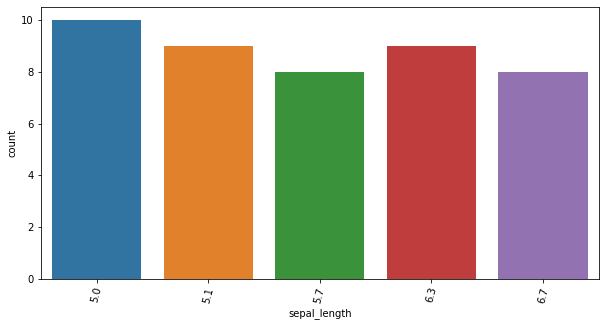

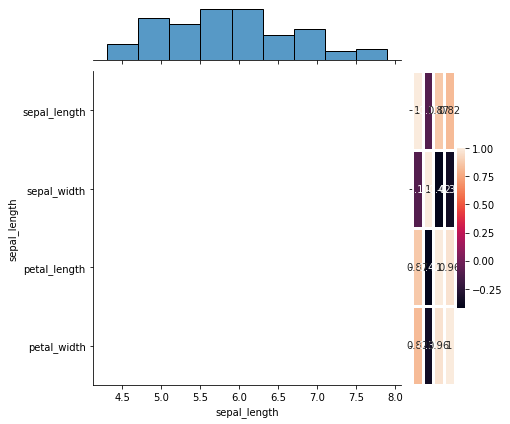

Pair Plot:



Output()


Pie Plot:



interactive(children=(Dropdown(description='Columns:', options=('species',), value='species'), Output()), _dom…

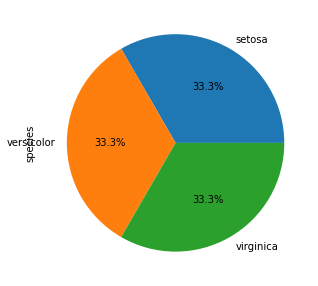

In [12]:
df_eda = dp.load_dataset("iris")
ae = Mleda(df_eda)
ae

# **References:**

**Official Documentaion Page:**

https://pypi.org/project/data-purifier/